In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from datetime import datetime
from sklearn.linear_model import BayesianRidge, LinearRegression
from data_retriever import db_parser

print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
df = db_parser.parse_db()
df.head(10)

,Gender,Ethnicity,Major,GPAHoursEarned,HomeState
0,M,White Non-Hispanic,Chemistry,140.0,NC
1,F,White Non-Hispanic,Accounting,160.0,NC
2,M,Black Non-Hispanic,History,130.0,NC
3,F,Black Non-Hispanic,Biology,59.0,NC
4,F,White Non-Hispanic,Education Studies(Elementary),165.0,NC
5,F,White Non-Hispanic,Psychology,130.0,NC
6,F,Hispanic,Psychology,138.0,MD
7,M,White Non-Hispanic,History,163.0,MA
8,F,White Non-Hispanic,Art,131.0,NC
9,M,White Non-Hispanic,Business Management,129.0,NC


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 5 columns):
Gender            4609 non-null object
Ethnicity         4609 non-null object
Major             4609 non-null object
GPAHoursEarned    4609 non-null float64
HomeState         4609 non-null object
dtypes: float64(1), object(4)
memory usage: 180.1+ KB


(array([   18.,    20.,    42.,    11.,  3049.,  1113.,   266.,    71.,
           14.,     5.]),
 array([  36.,   56.,   76.,   96.,  116.,  136.,  156.,  176.,  196.,
         216.,  236.]),
 <a list of 10 Patch objects>)

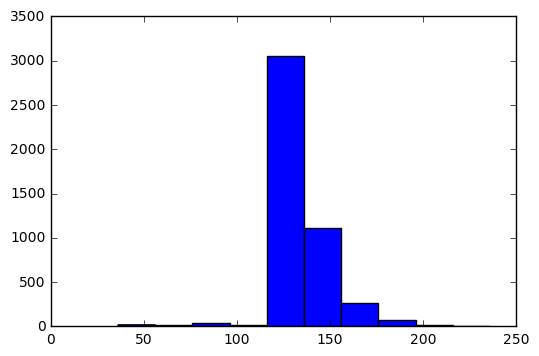

In [6]:
plt.hist(df["GPAHoursEarned"])

In [7]:
for column in ["Major", "Gender", "Ethnicity", "HomeState"]:
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 5 columns):
Gender            4609 non-null int8
Ethnicity         4609 non-null int8
Major             4609 non-null int8
GPAHoursEarned    4609 non-null float64
HomeState         4609 non-null int8
dtypes: float64(1), int8(4)
memory usage: 54.1 KB


In [9]:
df['Ethnicity']

0       7
1       7
2       3
3       3
4       7
5       7
6       4
7       7
8       7
9       7
10      4
11      2
12      7
13      7
14      7
15      7
16      7
17      7
18      3
19      5
20      7
21      7
22      7
23      6
24      6
25      7
26      2
27      7
28      7
29      7
       ..
4579    7
4580    4
4581    7
4582    7
4583    4
4584    6
4585    7
4586    7
4587    6
4588    7
4589    7
4590    3
4591    7
4592    7
4593    7
4594    7
4595    3
4596    7
4597    4
4598    7
4599    7
4600    6
4601    7
4602    3
4603    7
4604    6
4605    6
4606    7
4607    3
4608    4
Name: Ethnicity, dtype: int8

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['Gender', 'Ethnicity', 'HomeState', 'Major']],
                                                    df['GPAHoursEarned'],
                                                    test_size=0.3,
                                                    random_state=5)

In [8]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_test_predictions = regressor.predict(X_test)

In [9]:
r2_score(y_test, y_test_predictions, multioutput='variance_weighted')

-0.15152475190156989

In [10]:
mean_absolute_error(y_test, y_test_predictions)

9.9119891664836324

In [11]:
mean_squared_error(y_test, y_test_predictions)

272.02995116689152

In [12]:
median_absolute_error(y_test, y_test_predictions)

5.5728260869565247

In [13]:
explained_variance_score(y_test, y_test_predictions)

-0.1510828511422484

In [14]:
regressor.cv = r2_score(y_test, y_test_predictions, multioutput='variance_weighted')
regressor.version = datetime.today()

In [15]:
import joblib

joblib.dump(regressor, 'RegressionAnalysis.pkl')

['RegressionAnalysis.pkl',
 'RegressionAnalysis.pkl_01.npy',
 'RegressionAnalysis.pkl_02.npy',
 'RegressionAnalysis.pkl_03.npy']

In [16]:
regressor = joblib.load('RegressionAnalysis.pkl')

In [17]:
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)

ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
ols.coef_

array([-0.70927731,  0.59742414,  0.01380605, -0.05841641])

In [19]:
ols.intercept_

132.50683474379289

NameError: name 'w' is not defined

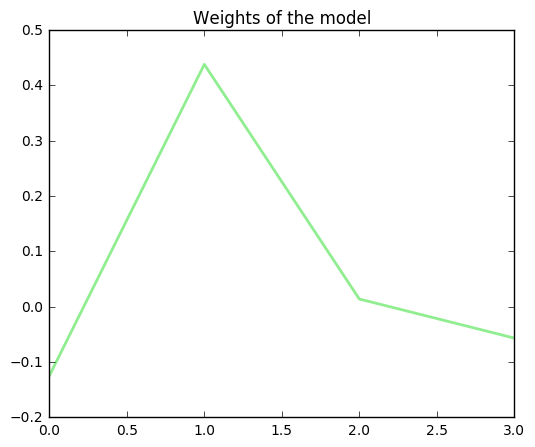

In [20]:
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.show()

In [24]:
# The coefficients
print('Coefficients: \n', ols.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((ols.predict(y_test) - (y_test_predictions) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % ols.score(y_test, y_test_predictions))

# Plot outputs
plt.scatter(y_test, y_test_predictions, color='black')
plt.plot(y_test, ols.predict(y_test_predictions), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

SyntaxError: invalid syntax (<ipython-input-24-fac89df8c5f2>, line 7)

In [25]:
#The fucntion to be used in the web app

In [ ]:
def OverallGPA_estimator(gender: int = 1, ethnicity: int = 8, home_state: int = 14, major: int = 25):
    return 